In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import warnings
warnings.filterwarnings('ignore')

---
# Class Imbalance

**Solution:**  
1. Over Sampling (Up-sampling) of under-represented class. 
2. Under Sampling (Down-sampling) of over-represented class.

***Balancing is done after sampling (train-test-split)**

---

# Logistic Regression

- Supervised Technique  
- Classification model

Function at core: Sigmoid function (Squash function)  
Formula used based on probabilities: $\ln {p\over{(1-p)}}$  

`p = probability of an event`  , range = -∞ -> +∞  

**Why is it Logistic *Regression* despite being a classification technique?**  
Even though the output is either 0 or 1, it can actually take any continuous value between 0 and 1 which makes it similar to a regression problem.

**NOTE:** [ In binary classification, the most important class is positive and least important one is taken as negative ]  

**Evaluation Metrics**  
1. Confusion Matrix
2. Accuracy
3. Precision
4. Recall
5. F1-score (Advantage: Doesn't make use of true negative)
6. AU-ROC curve

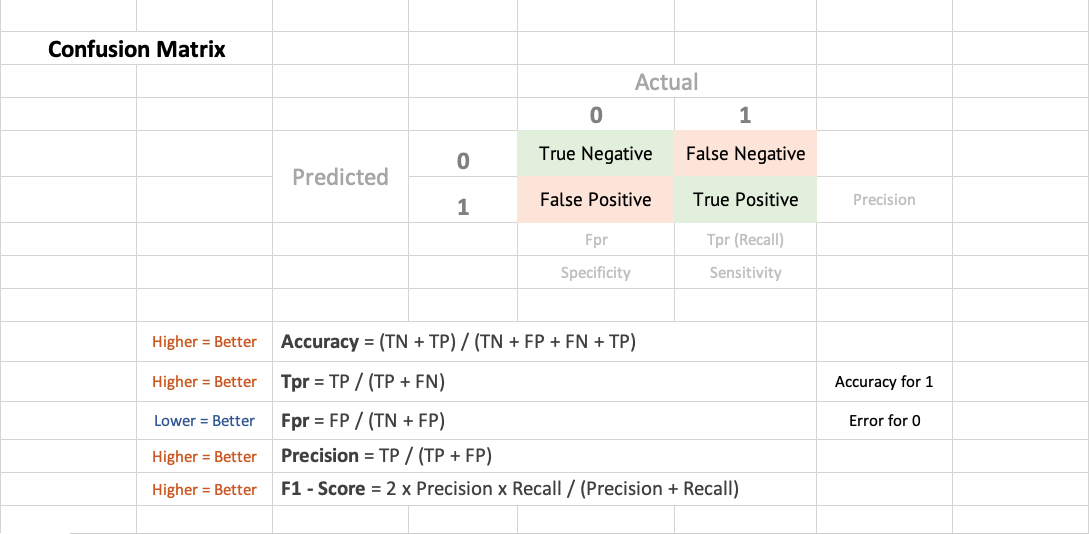

### Area Under ROC (Receiver Operating Characteristics) curve  


Fpr (0, 1): x-axis  
Tpr (0, 1): y-axis

- Higher the AU-ROC, better is the model.  

----

## Logistic Regression in action

### Problem Definition

> Build a predictive model which can predict whether to approve or reject loan.

#### Data Preprocessing

In [39]:
cr = pd.read_csv('CreditRisk.csv')
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
cr.shape

(981, 13)

#### Imputing missing values

In [41]:
cr.isna().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
cr['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

In [45]:
cr['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [46]:
cr['Dependents'].value_counts()

0.0    545
2.0    160
1.0    160
4.0     90
3.0      1
Name: Dependents, dtype: int64

In [48]:
cr["Self_Employed"].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [49]:
cr['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [50]:
cr['Gender'].fillna('Male', inplace=True)
cr['Married'].fillna('Yes', inplace=True)
cr['Dependents'].fillna(0, inplace=True)
cr['Self_Employed'].fillna('No', inplace=True)
cr['Credit_History'].fillna(0, inplace=True)
cr['LoanAmount'].fillna(cr.LoanAmount.mean(), inplace=True)
cr['Loan_Amount_Term'].fillna(cr.Loan_Amount_Term.mean(), inplace=True)

In [51]:
cr.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Converting categorical values to numerical

In [52]:
cr.Gender.replace({"Male" :1 , "Female":0} ,inplace = True)
cr.Married.replace({"No" :0 , "Yes":1} , inplace = True)
cr.Education.replace({"Graduate" :1  , "Not Graduate":0} , inplace = True)
cr.Self_Employed.replace({"No":0 , "Yes" :1 }, inplace = True)
cr.Property_Area.replace({"Semiurban" :1 ,"Urban": 2 , "Rural" :3} , inplace = True)
cr.Loan_Status.replace({"Y" :1 , "N" : 0}, inplace = True)

In [57]:
cr = cr.drop('Loan_ID', axis=1) # Dropping Loan_ID column because it's irrelevant

#### Splitting into X and y

In [58]:
X = cr.drop('Loan_Status', axis=1)
y = cr['Loan_Status']

#### Sampling into train and test data

In [59]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((784, 11), (197, 11), (784,), (197,))

#### Fitting the model

In [111]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

#### Evaluating the model

In [97]:
model.score(X_test, y_test)

0.7766497461928934

In [98]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_preds, y_test)

array([[ 27,  15],
       [ 29, 126]])

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc_score(y_test, y_preds)

0.6878799392097265

In [79]:
y_prob = pd.DataFrame(model.predict_proba(X_test))
y_prob

,0,1
0,0.193794,0.806206
1,0.442011,0.557989
2,0.257915,0.742085
3,0.129776,0.870224
4,0.727815,0.272185
...,...,...
192,0.797841,0.202159
193,0.100812,0.899188
194,0.112037,0.887963
195,0.601532,0.398468


In [87]:
fpr, tpr, threshold = roc_curve(y_test, y_prob[1])

Text(0.5, 1.0, 'ROC curve for Loan Application')

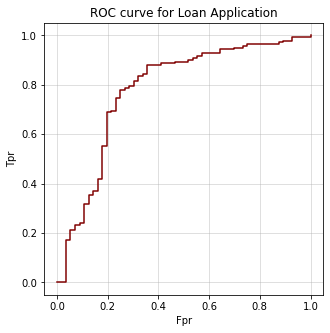

In [89]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='maroon')
plt.grid(alpha=0.5)

plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('ROC curve for Loan Application')

In [91]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_preds)
f1

0.8513513513513513

In [113]:
from sklearn.metrics import classification_report

print(classification_report(y_preds, y_test))

              precision    recall  f1-score   support

           0       0.48      0.64      0.55        42
           1       0.89      0.81      0.85       155

    accuracy                           0.78       197
   macro avg       0.69      0.73      0.70       197
weighted avg       0.81      0.78      0.79       197



_____
# Decision Tree

- Supervised algorithm
- Classification
- Target variable can have two or more categories

Decision Tree can be built in two ways:  
1. Entropy
2. Gini Index (Score)

**Entropy** 

A measure of Homogeneity/Heterogeneity of the data.
Homogeneous data - no information gain.
If the sample is completely heterogeneous, entropy is 1.

Entropy = $\sum(-p * log(p))$  ;`p = proportion(ratio)`  

For homogeneous data, entropy is not defined.  

**Gini Index**  

0 - perfect equality (Best case scenario)   
1 - perfect inequality  

Gini Index = $1 - \sum_{i=1}^{j} P_i^2$

____

#### Trying out DecisionTreeClassifier for the same dataset as above by balancing it

In [114]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight = 'balanced')
dt.fit(X_train, y_train)
y_preds = dt.predict(X_test)
dt.score(X_test, y_test)

0.7208121827411168

In [100]:
confusion_matrix(y_preds, y_test)

array([[ 26,  25],
       [ 30, 116]])

#### Feature Importances

In [101]:
dt.feature_importances_

array([0.01947398, 0.02649793, 0.06161629, 0.02224015, 0.01622798,
       0.19593298, 0.12033424, 0.18424044, 0.05702099, 0.26102984,
       0.03538518])

In [102]:
dt.feature_importances_.sum()

1.0000000000000002

In [104]:
feature_importance = pd.DataFrame({"Feature" :X_train.columns , "Importance"  :dt.feature_importances_})
feature_importance.sort_values("Importance" , ascending= False , inplace = True )
feature_importance

,Feature,Importance
9,Credit_History,0.261030
5,ApplicantIncome,0.195933
7,LoanAmount,0.184240
6,CoapplicantIncome,0.120334
2,Dependents,0.061616
8,Loan_Amount_Term,0.057021
10,Property_Area,0.035385
1,Married,0.026498
3,Education,0.022240
0,Gender,0.019474


_____
# Random Forest

- collection of trees (n trees)
- ensemble/bagging technique  

Hyperparameter: Parameters which aren't part of original data and the user can modify them.  

___

#### Trying out RandomForestClassifier for the same dataset as above

In [105]:
from sklearn.ensemble import RandomForestClassifier

# using n_estimators to control the number of trees
clf = RandomForestClassifier(n_estimators=100, class_weight='balanced')  
clf.fit(X_train , y_train)
y_preds = clf.predict(X_test)
clf.score(X_test, y_test)

0.7868020304568528

In [106]:
confusion_matrix(y_preds, y_test)

array([[ 30,  16],
       [ 26, 125]])

In [107]:
feature_importance = pd.DataFrame({"Feature": X_train.columns , "Importance": clf.feature_importances_})
feature_importance.sort_values("Importance", ascending= False, inplace=True)
feature_importance

,Feature,Importance
9,Credit_History,0.244495
5,ApplicantIncome,0.207336
7,LoanAmount,0.191910
6,CoapplicantIncome,0.120229
10,Property_Area,0.055540
2,Dependents,0.052749
8,Loan_Amount_Term,0.043941
1,Married,0.023400
0,Gender,0.021855
3,Education,0.021002


---

# Boosting

- Boosting also makes use of trees  
- Trees are dependant unlike Random Forest  
- Trees are run sequentially whereas in RF it's done parallely  
- AdaBoost: Adaptive Boost

-----
#### Trying out AdaBoostClassifier on the same dataset as above

In [108]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
y_preds = abc.predict(X_test)
abc.score(X_test, y_test)

0.7868020304568528

In [110]:
confusion_matrix(y_preds, y_test)

array([[ 29,  15],
       [ 27, 126]])

---
# Multi-Classification Problem

When a problem is multi-classification, having more than 2 classes, then:  

1st iteration: 1, (2,3) - (True, False)  
2nd iteration: 2, (1,3) - (True, False)  
3rd iteration: 3, (1,2) - (True, False)  
....

---
# Recursive Feature Elimination (RFE)  

- Feature Selection Technique  
- Done after data preprocessing
- Do it on entire data
- It's not a standalone algorithm (can be built on top of another algorithm)



In [116]:
from sklearn.feature_selection import RFE

dt  = DecisionTreeClassifier()
rfe_dt = RFE(dt, 5)  # 5 is the number of features to select
rfe_dt.fit(X, y)

rfe_dt.support_  

array([False, False, False, False, False,  True,  True,  True,  True,
        True, False])

False indicate the column is not important, and True implies the feature is important.

In [117]:
pd.DataFrame({"Feature": X.columns, "Imporatnce": rfe_dt.support_})

,Feature,Imporatnce
0,Gender,False
1,Married,False
2,Dependents,False
3,Education,False
4,Self_Employed,False
5,ApplicantIncome,True
6,CoapplicantIncome,True
7,LoanAmount,True
8,Loan_Amount_Term,True
9,Credit_History,True


---
# Outliers

For a normally distributed data,

- 1.000 SD ≈ 68% of our data
- 1.645 SD ≈ 90%
- 1.965 SD ≈ 95% (adopted more)
- 2.580 SD ≈ 99%
- 3.000 SD ≈ 99.7%

## Identifying outliers

In [11]:
df = pd.read_csv('LungCapData (2).csv - LungCapData (2).csv.csv')
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [12]:
df.shape

(725, 6)

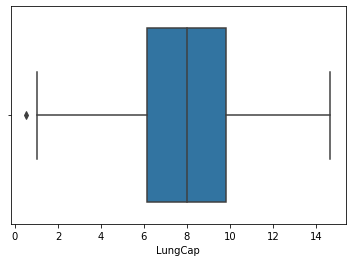

In [13]:
seaborn.boxplot(x=df['LungCap'])

As we can see there is an outlier nearing value 0 for Lung capacity

## Removing outliers

In [14]:
def remove_outliers(df, col, k): 
    '''
    Removes the outliers in the provided column of the provided dataframe.
    Accepts: Dataframe, Column with outliers, Standard deviation(k)
    Returns: New dataframe with outliers removed
    '''
    global df1
    mean = df[col].mean()
    sd = df[col].std()
    
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    
    df1 = df.loc[df[col].isin(final_list)]
    print(df1.shape); return df1

In [15]:
remove_outliers(df, 'LungCap', k=2)

(695, 6)


,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [16]:
df.shape[0] - df1.shape[0]  # No. of outliers eliminated from inital data

30

Increasing the value of k would result in inclusion of more data, i.e. lesser 
outliers/outlier elimination.

---

# K-Means Clustering

- Unsupervised alogorithm:  

    1. No prediciton is done  
    2. No train & test
    3. No performance evaluation metrices
    

- K - number of clusters (or groups) to be created
- K is a hyperparameter (not a part of data; user provided)  
- Data is grouped upon similarity, and similarity is measured upon distance (Euclidean) 
- Lesser the distance, more is the similarity
- It's an iterative algorithm
- It's a non-deterministic algorithm, i.e. for the same input and same function, different output will be produced.  
That happens because of random initial centroid choice. (Step 1)

**How K-Means work**
1. Randomly assign n centroids from the data (n=k)
2. Cluster the remaining data with respect to the centroids
3. Calculate mean of values in each clusters
4. Take those mean values as the centroid of those clusters
5. Recluster the remaining data with respect to new centroids
6. Repeat steps 3-5 until the centroid converges to a value

**How to find the optimum value for K**  

**Elbow Plot/Method**. 

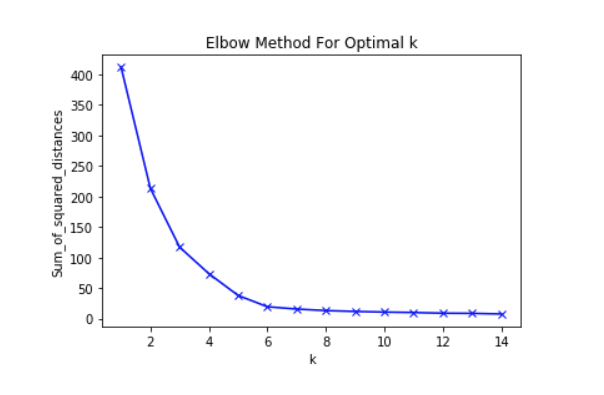

A graph with number of clusters on the x axis and SSD(Distance) or SSE on the y-axis.

----

Consider a cluster (k=1). And we have 10 observations: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10  
`Mean` = 5.5  
`SSD` = (5.5-1)^2 + (5.5-2)^2 + ..... + (5.5-10)^2 = 82.5

So for the given data, when k=1, the SSD is 82.5

If k=2, 1st cluster would have all values from 1-5, and 2nd cluster would have 6-10.  
Centroids will be mean of two sets respectively, i.e. 3 for 1st and 8 for 2nd.  

`SSD` = (3-1)^2 + (3-2)^2 + .... + (8-10)^2 = 20 (k=2)

When k=3, SSD decreases further. So as k increases, SSD decreases.

----

## K-Means Model in action
### Problem Statement 

The many millions of teenage consumers using social networking sites have attracted the attention of marketers struggling to find an edge in an increasingly competitive market. One way to gain this edge is to identify segments of teenagers who share similar tastes, so that clients can avoid targeting advertisements to teens with no interest in the product being sold.  

Build K-means clustering model to classify the interest of teenagers by using various attributes.   

**Data Description** 

The SNS dataset contains 30000 observations (rows) each represents a high school student and 40 features (columns) that provides information for the student.    

1 - Gradyear: Graduation year of the student (2006, 2007, 2008, 2009)   
2 - Gender: Gender of the student (male, female)   
3 - Age: Age of the student   
4 - Friends: No of friends     

For clustering, 36 words were chosen to represent five categories of interests: namely extracurricular activities, fashion, religion, romance, and antisocial behaviour. The 36 words include terms such as football, sexy, kissed, bible, shopping, death, and drugs.

In [146]:
pd.set_option('display.max_columns', None)

sns = pd.read_csv('snsdata.csv - snsdata.csv.csv')
sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [57]:
sns.shape

(30000, 40)

In [33]:
sns.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

#### Turning categorical values into numerical and filling the missing values

In [147]:
sns['gender'].replace({'M': 1, 'F': 0}, inplace=True)
sns['gender']

0        1.0
1        0.0
2        1.0
3        0.0
4        NaN
        ... 
29995    1.0
29996    1.0
29997    1.0
29998    1.0
29999    0.0
Name: gender, Length: 30000, dtype: float64

In [148]:
sns['gender'].value_counts()

0.0    22054
1.0     5222
Name: gender, dtype: int64

In [149]:
sns['gender'].fillna(0.0, inplace=True)

In [150]:
#sns.isna().sum()

In [151]:
sns['age'].fillna(sns['age'].mean(), inplace=True)

In [152]:
#sns.isna().sum()

#### Building the model

In [153]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(sns)

KMeans(n_clusters=3)

In [119]:
#list(model.labels_) # see which cluster each observations fit into (0, 1, or 2)

In [55]:
set(model.labels_) # see the unique values (clusters)

{0, 1, 2}

In [154]:
# Creating a series which represents the cluster of each records
cluster = pd.Series(model.labels_, name='cluster')

In [155]:
len(model.labels_) 

30000

It's same as the number of records, so that confirms every observation have been clustered.

In [156]:
''' Creating a new dataframe with all the existing columns 
of the sns along with the new labels column '''

sns_1 = pd.concat([sns, cluster], axis=1)
sns_1.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,1.0,18.982,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2006,0.0,18.801,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1
2,2006,1.0,18.335,69,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2006,0.0,18.875,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2006,0.0,18.995,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,1


In [157]:
# Sorting the whole dataframe with respect to clusters
sns_1.sort_values(['cluster'], inplace=True)

In [158]:
model.cluster_centers_  # Finding the centroids of each clusters

array([[2.00757605e+03, 1.46450400e-01, 1.79350145e+01, 5.73368594e+01,
        3.13704748e-01, 2.82087447e-01, 2.60695816e-01, 2.20733427e-01,
        1.77362482e-01, 1.55383169e-01, 1.24706159e-01, 1.19417019e-01,
        9.48519041e-02, 1.55500705e-01, 3.80112835e-01, 2.10037612e-01,
        1.53737659e-01, 1.42924307e-01, 1.11189469e-01, 4.96826516e-01,
        3.33333333e-01, 4.87776211e-02, 7.76680771e-01, 2.68335684e-01,
        5.37611660e-01, 3.06770099e-01, 1.39868359e-01, 2.28020686e-02,
        4.48401504e-01, 1.30230371e-01, 1.35637047e-01, 2.99952985e-01,
        4.23483780e-01, 1.61612600e-01, 9.07381288e-02, 6.55853315e-02,
        1.92054537e-01, 1.29877762e-01, 9.03855195e-02, 6.00611189e-02],
       [2.00745551e+03, 1.91231898e-01, 1.80332329e+01, 1.11776929e+01,
        2.40527673e-01, 2.37304106e-01, 2.05415592e-01, 1.29934537e-01,
        1.24380083e-01, 1.24231303e-01, 9.29875025e-02, 9.67070026e-02,
        8.34655822e-02, 1.33306884e-01, 2.88881174e-01, 2.07895

In [77]:
type(model.cluster_centers_)

numpy.ndarray

---

In [78]:
# Since it's ndarray, we can convert it to a dataframe for better readabilty
centroid_df = pd.DataFrame(model.cluster_centers_)
centroid_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,2007.455515,0.191232,18.033233,11.177693,0.240528,0.237304,0.205416,0.129935,0.124380,0.124231,0.092988,0.096707,0.083466,0.133307,0.288881,0.207895,0.132216,0.114957,0.098344,0.386382,0.285310,0.036848,0.719203,0.232642,0.423924,0.215582,0.098145,0.020284,0.404086,0.099534,0.080936,0.229072,0.313232,0.141391,0.056437,0.041609,0.179230,0.105783,0.084755,0.061149
1,2007.688253,0.090361,17.775056,144.710090,0.377259,0.289157,0.243223,0.254518,0.208584,0.154367,0.198042,0.137048,0.097892,0.141566,0.472139,0.228163,0.197289,0.198795,0.125753,0.554970,0.300452,0.045181,0.771837,0.245482,0.630271,0.367470,0.145331,0.027861,0.537651,0.161145,0.137048,0.414157,0.505271,0.172440,0.140060,0.103916,0.207078,0.142319,0.121235,0.051958
2,2007.576046,0.146450,17.935015,57.336859,0.313705,0.282087,0.260696,0.220733,0.177362,0.155383,0.124706,0.119417,0.094852,0.155501,0.380113,0.210038,0.153738,0.142924,0.111189,0.496827,0.333333,0.048778,0.776681,0.268336,0.537612,0.306770,0.139868,0.022802,0.448402,0.130230,0.135637,0.299953,0.423484,0.161613,0.090738,0.065585,0.192055,0.129878,0.090386,0.060061


#### Interpreting the dataframe

We made 3 clusters (0, 1, 2)  
So we have 3 centroids (each rows in the dataframe)  
Since there were 40 columns in the data set, the centroid would have 40 coordinates:  

Centroid(cluster 0) = (2007.455, 0.191232, 18.03, ....., 0.061149)  
Centroid(cluster 1) = (2007.688, ...., 0.051958)  
Centroid(cluster 2) = (2007.576, ...., 0.060061)  

---

#### Finding the optimum value for K

In [159]:
model.score(sns) # SSD for the value of K chosen

-11298651.299693532

The negative sign basically conveys that it's an 'error' value. So while building the necessary plots, we have to ignore the negative sign.

In [160]:
# Evaluating scores for different values of K
nc = list(range(1, 8))

model_list = [KMeans(n_clusters = i) for i in nc]
scores_list = [model_list[i].fit(sns).score(sns) for i in range(len(model_list))]

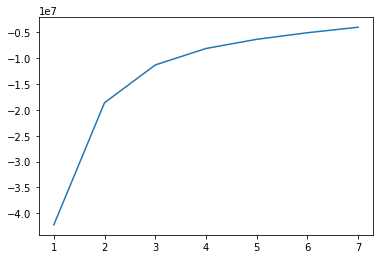

In [161]:
plt.plot(nc, scores_list);

This is not the expected curve, because the y values are negative right now. So take the absolute values of each:

In [162]:
scores_list = np.absolute(scores_list)

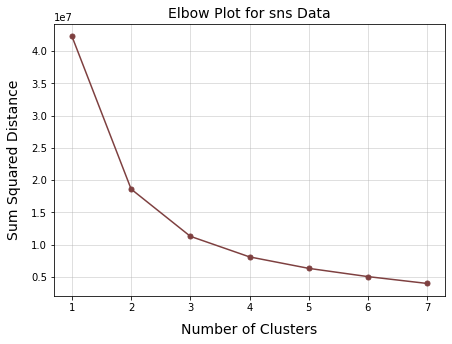

In [164]:
plt.figure(figsize=(7,5))
plt.plot(nc, scores_list, color='#7E4040', marker='.', markersize=10)

plt.xlabel('Number of Clusters', fontdict={'fontsize':14}, labelpad=10)
plt.ylabel('Sum Squared Distance', fontdict={'fontsize':14}, labelpad=10)
plt.title('Elbow Plot for sns Data', fontdict={'fontsize':14})
plt.grid(alpha=0.5)

----

# Ridge and Lasso

- Flavours of linear regression
- Known as Regularisation/Generalisation Technique  

### Loss Function
A loss function or cost function is a function that maps an event or values of one or more variables onto a real number intuitively representing some "cost" associated with the event. An optimization problem seeks to minimize a loss function.  

In Linear Regression, cost function (or error) was: $MSE$   

In Lasso (L1), it's:  $MSE+\lambda \sum |\beta|$  

In Ridge (L2), it's:  $MSE+\lambda \sum \beta^2$

($\lambda$ is just a sequence of numbers)

So error in Linear Regression < Lasso < Ridge  
Therefore, Lasso & Ridge can be used to ensure there's no overfitting 

- Ridge model can be used when there's multicollinearity in the features. It's because the $\beta$ values are shrinked during fitting.  
- Lasso model can be used in feature selection because one or more $\beta$ values may become exactly zero.

___

## VIF (Variance Inflation Factor)  

- Used to check multi-collinearity
- If value is between 0-5, there's no multi-collinearity
- 5-10, some multi-collinearity but can be ignored
- if >10, Multi-collinearity

In [165]:
bfat = pd.read_csv("bodyfat.csv")
bfat.head()

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,32.3,41,247.25,73.50,42.1,117.0,115.6,26.3,37.3,19.7
1,22.5,31,177.25,71.50,36.2,101.1,92.4,24.6,30.1,18.2
2,22.0,42,156.25,69.00,35.5,97.8,86.0,24.0,31.2,17.4
3,12.3,23,154.25,67.75,36.2,93.1,85.2,21.9,32.0,17.1
4,20.5,46,177.00,70.00,37.2,99.7,95.6,22.5,29.1,17.7


In [166]:
X = bfat.drop('Bodyfat', axis=1)
y = bfat['Bodyfat']

In [170]:
bfat.corr()

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
Bodyfat,1.000000,0.255798,0.595959,0.032210,0.504443,0.682266,0.811593,0.387911,0.418107,0.373095
Age,0.255798,1.000000,-0.097905,-0.268673,0.038501,0.072908,0.141339,-0.073522,-0.079398,0.216315
Weight,0.595959,-0.097905,1.000000,0.568433,0.838977,0.916047,0.888317,0.790388,0.786266,0.755123
Height,0.032210,-0.268673,0.568433,1.000000,0.370396,0.345312,0.265403,0.454985,0.435460,0.420928
Neck,0.504443,0.038501,0.838977,0.370396,1.000000,0.789799,0.769086,0.664068,0.701067,0.777259
Chest,0.682266,0.072908,0.916047,0.345312,0.789799,1.000000,0.922728,0.700092,0.730124,0.695795
Abdomen,0.811593,0.141339,0.888317,0.265403,0.769086,0.922728,1.000000,0.643211,0.652148,0.672061
Ankle,0.387911,-0.073522,0.790388,0.454985,0.664068,0.700092,0.643211,1.000000,0.650841,0.688320
Biceps,0.418107,-0.079398,0.786266,0.435460,0.701067,0.730124,0.652148,0.650841,1.000000,0.630473
Wrist,0.373095,0.216315,0.755123,0.420928,0.777259,0.695795,0.672061,0.688320,0.630473,1.000000


In [181]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame() # Empty df
vif['VIF Values'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Variables'] = X.columns

vif

,VIF Values,Variables
0,28.417841,Age
1,254.686182,Weight
2,584.112210,Height
3,1034.837667,Neck
4,1300.683469,Chest
5,762.776397,Abdomen
6,749.664640,Ankle
7,315.315845,Biceps
8,1250.049107,Wrist


Since the VIF values are >10, there's multi-collinearity.  
Drop a few columns to fix it.

____

In [188]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
lr.coef_

array([ 8.37793344e-02, -8.33221931e-02,  3.59322556e-02,  1.12299488e-03,
       -1.38741586e-01,  1.03274094e+00,  2.25942608e-01,  1.48276392e-01,
       -2.20339906e+00])

In [189]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X, y)
ridge.coef_ 

array([ 0.08163352, -0.08421588,  0.03312492, -0.01323566, -0.13683971,
        1.0327911 ,  0.20932576,  0.14674991, -2.12104621])

In [190]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X, y)
lasso.coef_

array([ 0.01459462, -0.13525194, -0.        , -0.        , -0.        ,
        0.96688777, -0.        ,  0.        , -0.        ])

As we can see, in Ridge model the $\beta$ values shrinked, while in Lasso a few $\beta$ dropped to zero

In [191]:
feature_score_df = pd.DataFrame({'Feature': X.columns, 'Score': list(lasso.coef_)})
feature_score_df

,Feature,Score
0,Age,0.014595
1,Weight,-0.135252
2,Height,-0.000000
3,Neck,-0.000000
4,Chest,-0.000000
5,Abdomen,0.966888
6,Ankle,-0.000000
7,Biceps,0.000000
8,Wrist,-0.000000


___

# Some useful codes

In [118]:
# Label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df[df.select_dtypes(include=['object']).columns] = 
df[df.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [ ]:
# Display all rows and columns in the output

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Convert a column's datatype

cr.Gender = cr.Gender.astype('int')

In [ ]:
# Rename a column name

cr.rename(columns={"Gender": "Gender_New"}, inplace = True)

In [ ]:
# Replace values in a column

cr.Gender.replace({"Male" :0 , "Female": 1}  , inplace = True)

In [ ]:
# Subsetting based on a condition

cr2 = cr[(cr.ApplicantIncome > 4000 ) & (cr.Gender == 2)]
cr2.head()

In [ ]:
# Grouped dataframe

cr.groupby(['Gender' , 
            'Education' , 
            'Married']).ApplicantIncome.agg(['max', 
                                             'mean', 
                                             'median'])

In [ ]:
# Making a crosstab

pd.crosstab(cr.Gender , cr.Education)

---